# Profitability Analysis For Company's Apps on App Store And Play Stor

The Aime of this study is to gain a common sense about which types of apps are profitable the most in the App Store and the Play Store, then introduce our conclusion in a way that can help the developers team at our company make decision about the kind of apps they will develop in the future.

# Exploring The Data
The data provided to us as two csv files one for the Play-Store apps and another one for the App-Store apps and the details of each app is represented in the rows of the files.
### Data sources:

- [Play Store Data-Set](https://www.kaggle.com/lava18/google-play-store-apps/home)
- [App Store Data-Set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)

Now we are going to dive into our files to gain more general information about the data sets.

In [1]:
import pandas as pd

#opening the appStore data
app_store_data = pd.read_csv('AppleStore.csv')


#opening the play storedata
play_sotre_data = pd.read_csv('googleplaystore.csv')


now we can view some rows of our data-sets

In [2]:
app_store_data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [3]:
play_sotre_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Before we go any further, we are going to work with each data-set separately. Now we are going to start with the Play Store Data-Set

# Detecting Wrong Data
we can see in [The Discussion](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) on the source of our data set that the row # 10472 of the Play-Store dataset has wrong data so we are going to delete it.

In [4]:
play_sotre_data.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

as we can see the value of Rating is 19 which is clearly not possible

In [5]:
print(play_sotre_data.shape)
play_sotre_data.drop(play_sotre_data.index[10472],inplace = True) 
print(play_sotre_data.shape)

(10841, 13)
(10840, 13)


# Multiple Rows For One App
Now we are going to check if there's any app that is represented more than one time in our data sets.

In [6]:
(play_sotre_data['App'].value_counts() > 1).sum()

798

In [7]:
(app_store_data['track_name'].value_counts()>1).sum()

2

as we can see there are 798 apps in Play Store dataset and 2 apps in the App Store dataset that are represented by more than one row, so next we are going to look at some examples of these apps and decide which rows are we going to keep.

In [8]:
play_sotre_data.loc[play_sotre_data['App']=='Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


so it turned out that the rows are not entirely the same, the Reviews column are different, so we are going to keep the rows that have the maximum Reviews value.

In [9]:
play_sotre_data['App'].duplicated(keep='first').sum()

1181

In [10]:
play_store_before = play_sotre_data.shape
app_store_before = app_store_data.shape
play_sotre_data.sort_values('Reviews')
play_sotre_data = play_sotre_data.drop_duplicates(subset='App',keep='first')
app_store_data = app_store_data.drop_duplicates('track_name',keep='first')
print('before', play_store_before,'after',play_sotre_data.shape)
print('before',app_store_before,'after',app_store_data.shape)

before (10840, 13) after (9659, 13)
before (7197, 16) after (7195, 16)


we can check now that there's exactly one row for each app

In [11]:
(play_sotre_data['App'].value_counts() > 1).sum()

0

In [12]:
(app_store_data['track_name'].value_counts() > 1).sum()

0

Now we are done cleaning the data. What we need now is to extract the data that is similar to our interests, our company produces English profitable apps, so we need to remove any app that does not match our objective.
# Removing Free Apps

In [13]:
play_sotre_data = play_sotre_data.loc[play_sotre_data['Price'] != '0' ]
app_store_data = app_store_data.loc[app_store_data['price'] != 0 ]

Finally, we need to remove all the not free and not English apps as our company only works with English and free apps

# Removing Non-English Apps
after exploring the data we can see that both data-sets contain some non-English apps

In [14]:
print(app_store_data.iloc[-1,1])

中学英文法総復習 パターンで覚える 瞬間英文法


Ok, so now what we are looking for are apps which their names consists of English alphapet, digits, punctuation symbols, *,-,+,/, and/or emojies.

In [15]:
def isEnglish(s):
    nonasciiCount = 0
    for i in s:
        if ord(i) > 127:
            nonasciiCount += 1
        if nonasciiCount> 3:
            return False
    
    else:
        return True
print(isEnglish('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(isEnglish('Instachat 😜'))

False
True


Now we are going to use the ``isEnglish`` function to remove our non-English apps in the data sets

In [16]:
app_store_data=app_store_data[app_store_data['track_name'].apply(isEnglish)]
play_sotre_data=play_sotre_data[play_sotre_data['App'].apply(isEnglish)]

In [17]:
play_sotre_data.shape

(752, 13)

In [18]:
app_store_data.shape

(2961, 16)

Finally what we are left with is 752 app in Play Store and 2961 in the app store, our objective is to find the kinds of apps that are popular and profitable at both stores and then suggest our finding to developers at our company.
Let's look at the columns of our datasets and decide which ones can help us make this decision.

what we are going to focus on is the genres of the apps and compare the ratings, the number of installs and prices.
# Best Genres In The App Store

In [19]:
genre_rate = app_store_data[['prime_genre','user_rating']].groupby('prime_genre').agg('mean').sort_values('user_rating',
                                                                                                         ascending=False)
genre_rate

,user_rating
prime_genre,
Catalogs,4.500000
Shopping,4.500000
Games,4.062912
Productivity,4.044643
Reference,4.042857
Music,4.014085
Business,3.986111
Book,3.951220
Health & Fitness,3.895000


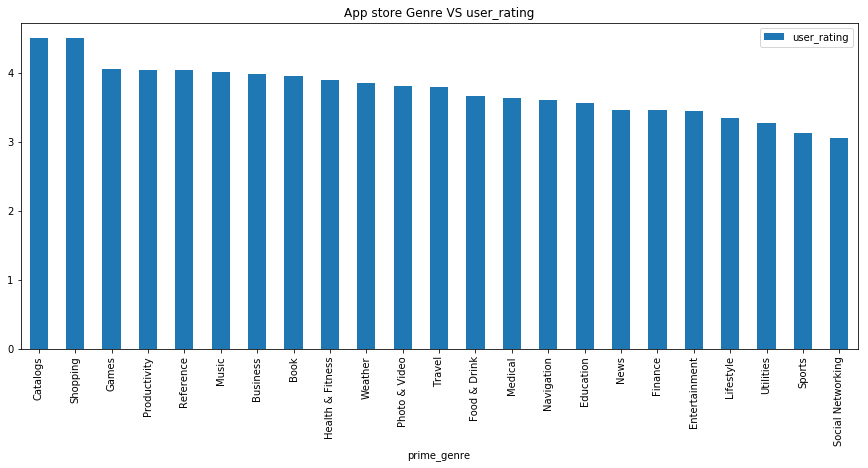

In [49]:
genre_rate.plot.bar(figsize=(15,6), title = 'App store Genre VS user_rating')

In [21]:
genre_rate_count = app_store_data[['prime_genre','rating_count_tot']].groupby('prime_genre').agg('mean').sort_values('rating_count_tot',
                                                                                                                     ascending=False)
genre_rate_count

,rating_count_tot
prime_genre,
Games,6695.863636
Business,4043.472222
News,3872.357143
Weather,3248.414634
Music,2759.197183
Shopping,2722.000000
Health & Fitness,2679.850000
Photo & Video,2531.519337
Reference,2400.371429


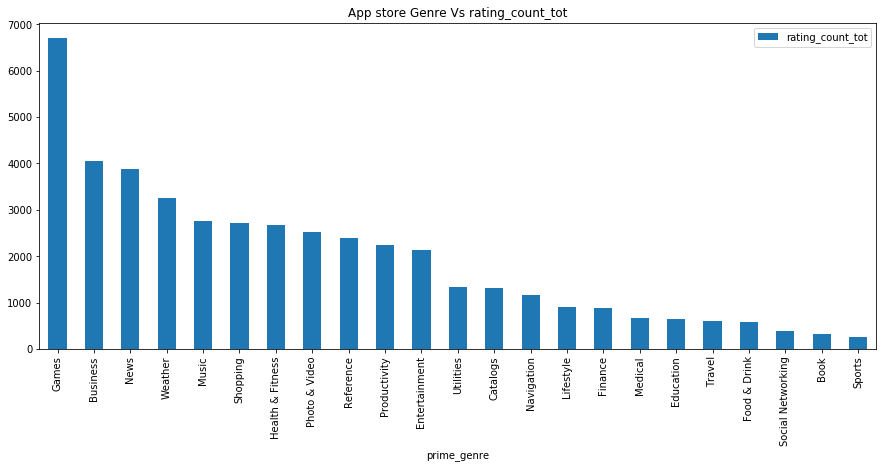

In [22]:
genre_rate_count.plot.bar(figsize=(15,6), title = 'App store Genre Vs rating_count_tot')

In [23]:
genre_price = app_store_data[['prime_genre','price']].groupby('prime_genre').agg('mean').sort_values('price',ascending=False)
genre_price

,price
prime_genre,
Medical,13.456667
Music,9.398451
Catalogs,7.990000
Business,7.934444
Navigation,7.217273
Productivity,6.793571
Education,5.880411
Reference,4.932857
Book,4.672927


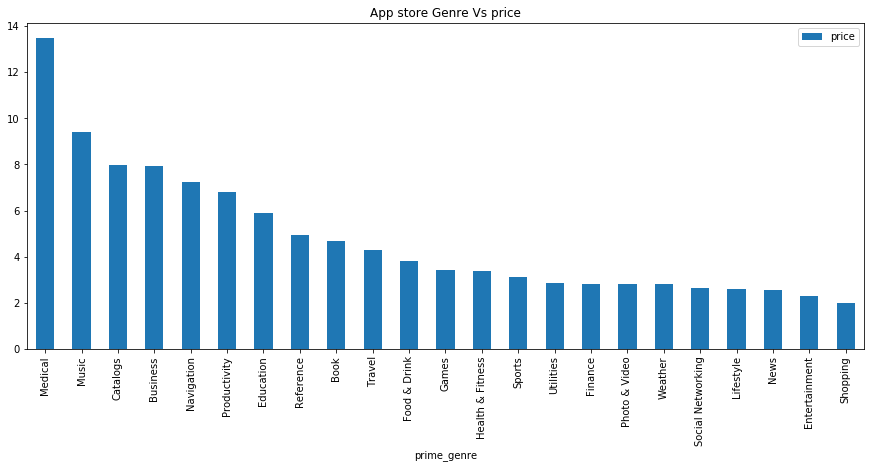

In [24]:
genre_price.plot.bar(figsize=(15,6),title = 'App store Genre Vs price')

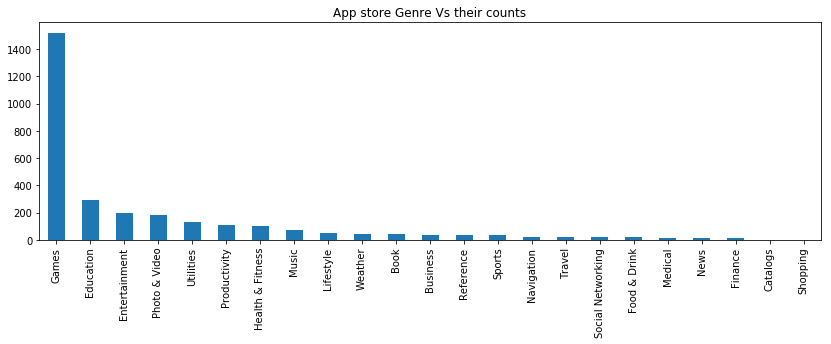

In [48]:
app_store_data['prime_genre'].value_counts().plot.bar(figsize=(14,4),title = 'App store Genre Vs their counts')

After we've seen some of the statistics of the genre in app store, apparently games genre is the best. But there is somethings we need to note:
* The music apps have high rate, relatively high prices and relatively low number of apps, so that may provide less competition for our app in the market unlike the game apps.
* The medical apps has the highest price, average total number of rates: 664 and a very very low number of apps, so a good app in the medical genre can make more profit than some bad game

Now let's take a look at the Play Store data
# Best Genres In The Play Store
Here the genre is divided into two tables ``Genres`` and ``Category``

In [26]:
play_sotre_data['Installs']=play_sotre_data['Installs'].str.replace('+', '').str.replace(',','').astype(int)
cat_instal=play_sotre_data[['Installs','Category']].groupby('Category').agg('mean').sort_values('Installs'
                                                                                                ,ascending=False)
cat_instal

,Installs
Category,
GAME,256097.134146
EDUCATION,150500.000000
FAMILY,114081.292818
WEATHER,101500.000000
ENTERTAINMENT,100000.000000
PHOTOGRAPHY,98881.052632
LIFESTYLE,65506.111111
SPORTS,51825.625000
PRODUCTIVITY,50430.535714


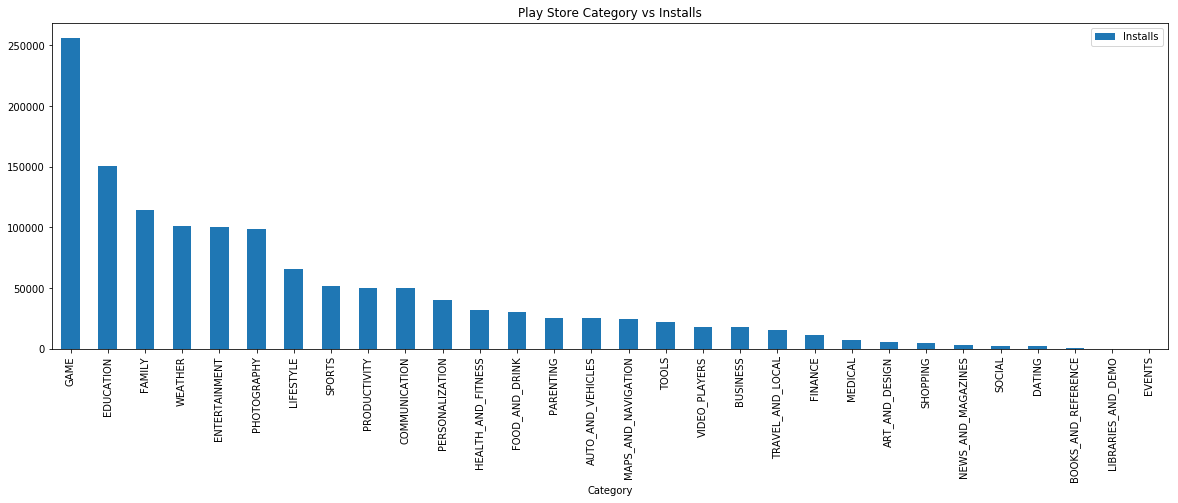

In [27]:
cat_instal.plot.bar(figsize=(20,6), title='Play Store Category vs Installs')

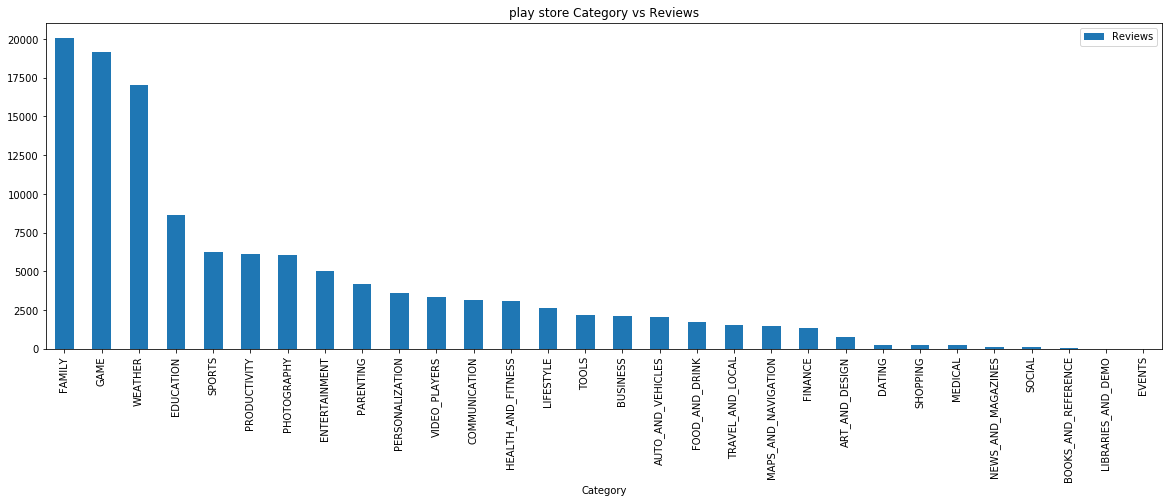

In [28]:
play_sotre_data['Reviews']=play_sotre_data['Reviews'].astype(int)
cat_rev=play_sotre_data[['Reviews','Category']].groupby('Category').agg('mean').sort_values('Reviews'
                                                                                                ,ascending=False)
cat_rev.plot.bar(figsize=(20,6), title='play store Category vs Reviews')

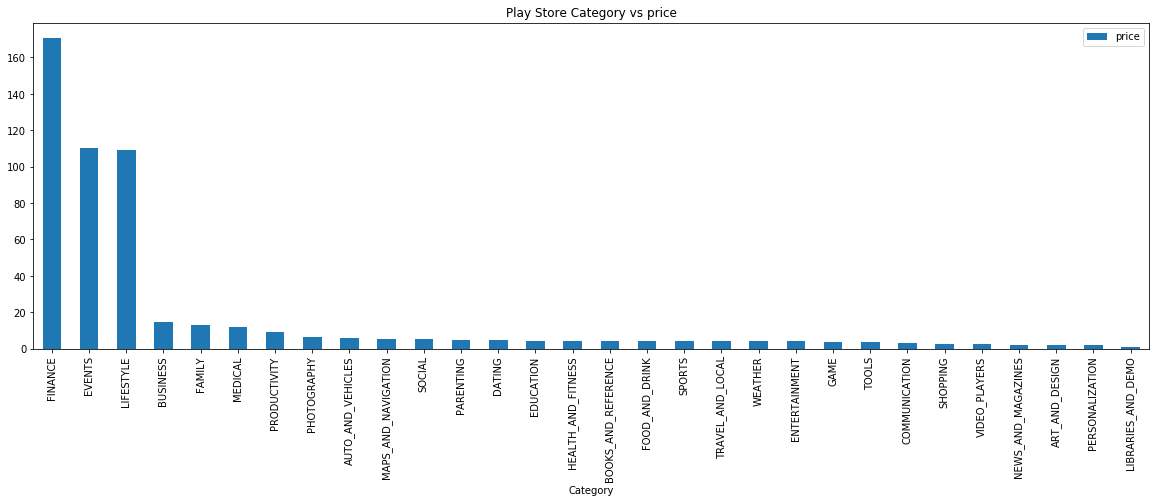

In [29]:
play_sotre_data['price']=play_sotre_data['Price'].str.replace('$',"").astype(float)

cat_price=play_sotre_data[['price','Category']].groupby('Category').agg('mean').sort_values('price'
                                                                                                ,ascending=False)
cat_price.plot.bar(figsize=(20,6),title='Play Store Category vs price')

In [30]:
play_sotre_data['Rating']=play_sotre_data['Rating'].astype(float)
cat_rate = play_sotre_data[['Rating', 'Category']].groupby('Category').agg('mean').sort_values('Rating', ascending=False)
cat_rate

,Rating
Category,
NEWS_AND_MAGAZINES,4.800000
EDUCATION,4.750000
ART_AND_DESIGN,4.733333
AUTO_AND_VEHICLES,4.600000
ENTERTAINMENT,4.600000
SHOPPING,4.500000
PERSONALIZATION,4.447692
HEALTH_AND_FITNESS,4.390909
GAME,4.372368


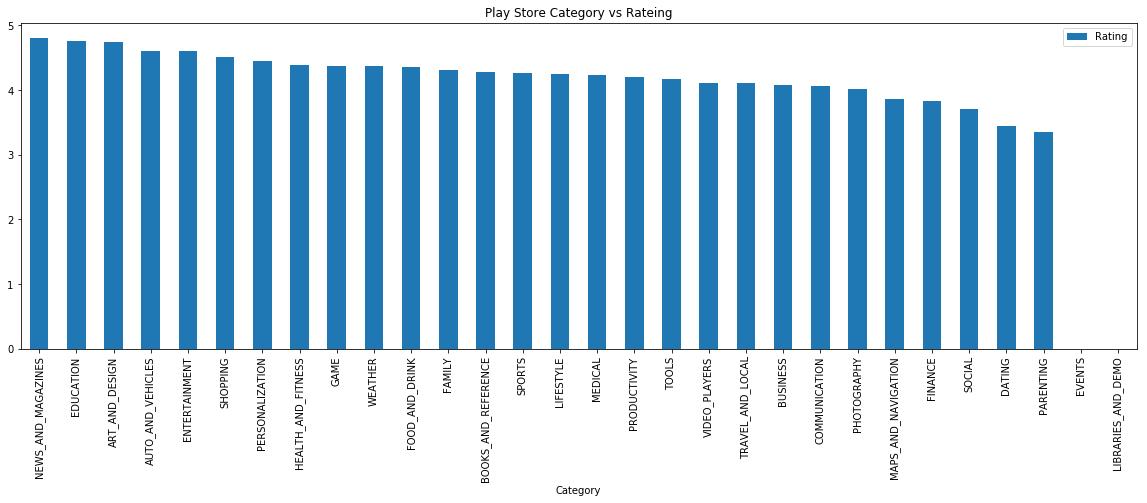

In [31]:
cat_rate.plot.bar(figsize=(20,6),title='Play Store Category vs Rateing')

So similar to the App Store most apps downloaded for the Play Store are games, but to get more insight about our other claims about other apps genre like music and medical apps we are going to look at the ``Genres`` column

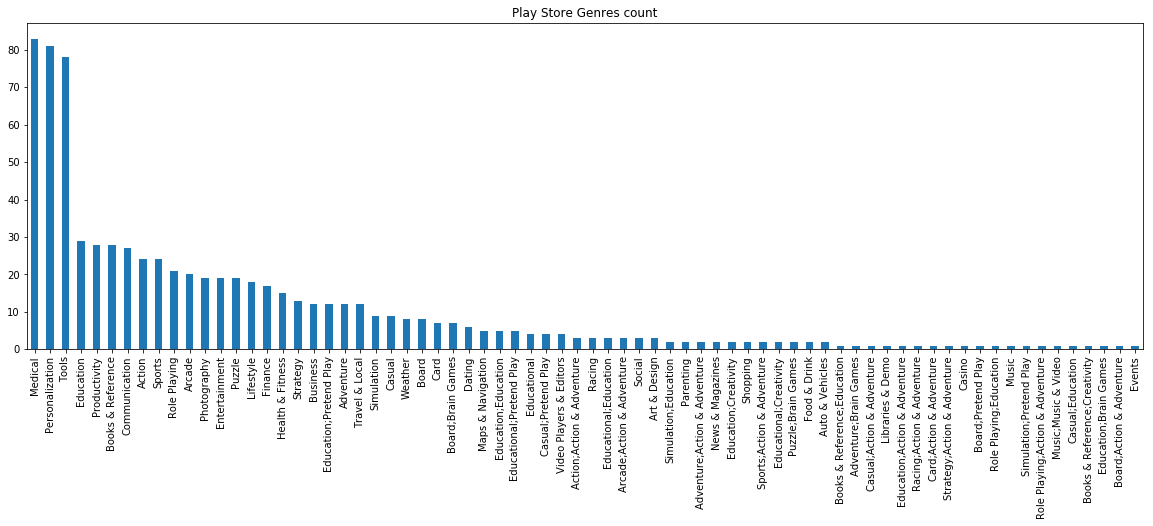

In [32]:
play_sotre_data['Genres'].value_counts().plot.bar(figsize=(20,6),title='Play Store Genres count')

In [33]:
music_subset=play_sotre_data.loc[play_sotre_data['Genres'].str.contains(r'[Mm]usic'),['Genres','Rating','Reviews','Installs','price']]

In [34]:
music_subset

,Genres,Rating,Reviews,Installs,price
8085,Music,4.7,16851,100000,1.99
9470,Music;Music & Video,4.7,143,1000,1.99


In [35]:
music_subset['Genres'] = 'Music'
music_subset['Reviews']=music_subset['Reviews'].astype(int)
music_subset[['Reviews','Installs','Genres']].groupby('Genres').agg('sum')

,Reviews,Installs
Genres,,
Music,16994,101000


In [36]:
music_subset[['price','Rating','Genres']].groupby('Genres').agg('mean')

,price,Rating
Genres,,
Music,1.99,4.7


there are only two music apps on the Play Store with 101000 install so over the two store a music app have less competition and can gain a lot of money. Unlike the App Store the Medical apps are the most common apps in the Play Store next we are going to look closely at them.

In [37]:
med_subset=play_sotre_data.loc[play_sotre_data['Genres'].str.contains(r'[Mm]edical'),['Genres','Rating','Reviews','Installs','price']]

In [38]:
med_subset.head()

,Genres,Rating,Reviews,Installs,price
2243,Medical,4.2,1135,100000,9.00
2244,Medical,4.4,578,10000,0.99
2245,Medical,4.6,129,10000,5.49
2246,Medical,4.5,63,10000,9.99
2247,Medical,4.8,216,10000,6.99


In [39]:
med_subset['Reviews']=med_subset['Reviews'].astype(int)
med_subset[['Reviews','Installs','Genres']].groupby('Genres').agg('sum')

,Reviews,Installs
Genres,,
Medical,20006,560833


In [40]:
med_subset[['price','Rating','Genres']].groupby('Genres').agg('mean')

,price,Rating
Genres,,
Medical,11.996386,4.234921


As we can see that the medical genre is also promising in the Play store. 
The ``personalization`` genre in the Play Store is similar to the ``Life Style`` genre in the App Store and those apps has high numbers of downloads in both stores because there is no age limits.

In [41]:
play_sotre_data.loc[play_sotre_data['Genres'] =='Personalization'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price
3403,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000,Paid,$2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,2.49
3405,HD Widgets,PERSONALIZATION,4.3,58617,26M,1000000,Paid,$0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up,0.99
3408,Kairo XP (for HD Widgets),PERSONALIZATION,4.4,1591,779k,10000,Paid,$0.99,Everyone,Personalization,"January 7, 2015",1.1,4.0.3 and up,0.99
3441,BIG Launcher,PERSONALIZATION,4.3,881,5.9M,10000,Paid,$9.99,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up,9.99
3442,Smart Launcher Pro 3,PERSONALIZATION,4.6,40704,Varies with device,100000,Paid,$4.49,Everyone,Personalization,"March 16, 2018",Varies with device,Varies with device,4.49


In [42]:
app_store_data.loc[app_store_data['prime_genre']=='Lifestyle'].head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1246,673120263,Step Out Of Bed! Smart alarm clock to get awak...,35266560,USD,1.99,6696,5031,4.0,4.0,1.2.2,4+,Lifestyle,40,0,10,1
1269,749057895,Pimp Your Screen - Custom Themes & Wallpapers,81352704,USD,1.99,6424,533,4.5,4.5,4.2,4+,Lifestyle,37,5,13,1
1275,1044867788,Day One Journal,182986752,USD,4.99,6380,71,4.5,4.5,2.1.10,4+,Lifestyle,37,5,16,1
1447,419135449,iTheme - Themes for iPhone and iPad,52618240,USD,1.99,4719,61,4.0,4.5,5.1,4+,Lifestyle,37,5,23,1
2082,420859056,My Baby's Beat - Prenatal Listener,70041600,USD,4.99,1887,75,3.0,3.5,3.08,4+,Lifestyle,37,4,4,1


# Top 10 Apps In Each Store
we are going to look at the most downloaded apps in Play Store and in App store

In [43]:
play_sotre_data.sort_values('Installs',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,$0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,0.99
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,6.99
9165,League of Stickman 2018- Ninja Arena PVP(Dream...,GAME,4.4,32496,99M,1000000,Paid,$0.99,Teen,Action,"July 3, 2018",5.3.3,2.3 and up,0.99
6675,Infinity Dungeon VIP,FAMILY,4.3,21804,44M,1000000,Paid,$0.99,Everyone 10+,Role Playing,"July 3, 2018",2.6.6,2.3 and up,0.99
9151,Lost Journey (Dreamsky),GAME,4.5,32344,29M,1000000,Paid,$0.99,Everyone,Adventure,"October 21, 2016",1.3.12,3.0 and up,0.99
8804,DraStic DS Emulator,GAME,4.6,87766,12M,1000000,Paid,$4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up,4.99
5490,True Skate,SPORTS,4.4,129409,73M,1000000,Paid,$1.99,Everyone,Sports,"August 4, 2018",1.5.1,4.0.3 and up,1.99
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419,100M,1000000,Paid,$0.99,Everyone 10+,Action,"August 3, 2018",2.3.24,4.1 and up,0.99
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48M,1000000,Paid,$5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up,5.99
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966,872k,1000000,Paid,$5.99,Everyone,Lifestyle,"June 27, 2018",20180608,4.0 and up,5.99


In [44]:
app_store_data.sort_values('rating_count_tot',ascending=False).head(10)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
11,362949845,Fruit Ninja Classic,104590336,USD,1.99,698516,132,4.5,4.0,2.3.9,4+,Games,38,5,13,1
17,500116670,Clear Vision (17+),37879808,USD,0.99,541693,69225,4.5,4.5,1.1.3,17+,Games,43,5,1,1
18,479516143,Minecraft: Pocket Edition,147787776,USD,6.99,522012,1148,4.5,4.5,1.1,9+,Games,37,1,11,1
28,350642635,Plants vs. Zombies,105379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
37,307727765,Doodle Jump,48741376,USD,0.99,395261,88,4.5,4.5,3.17.6,4+,Games,37,0,1,1
45,488627858,Draw Something,84379648,USD,2.99,360974,3,4.5,4.5,3.0.17,4+,Games,38,5,1,1
53,387428400,Infinity Blade,624107810,USD,0.99,326482,177050,5.0,5.0,1.4.1,12+,Games,43,5,13,1
70,625334537,Geometry Dash,83931136,USD,1.99,266440,6263,5.0,4.5,2.10,4+,Games,37,4,1,1
86,417817520,Tiny Wings,30252032,USD,0.99,219418,328,4.5,4.5,2.2,4+,Games,37,0,6,1
88,322423174,Traffic Rush,8573952,USD,0.99,213092,51,3.5,4.5,1.45.1,9+,Games,37,3,1,1


# Conclusion
The apps that is guaranteed to make profit in both stores are the Games, Lifestyle and personalization genres.The apps that is considered promising(have less competition and relatively high audience) are the music and medical genres.